In [3]:
#Este analisis verifica si la cercanía la linea A de subte afecta el precio.

import pandas as pd
import numpy as np
#import shapely
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

#Cargamos los datos que ya tenemos procesados

#Datos procesados
filteredData = pd.read_csv('dataFiltrada/dataV4.csv',low_memory = False)


#Tomo los datos que me interesan: estado, barrio, superficie, precio por m2, latitud y longitud)
data = filteredData

#Elimino NAs
data.dropna(inplace=True)


#Me quedo con las propiedades que atraviesan las distintas lineas
propRecorridoA = data[data.barrio.str.contains('Monserrat') |
                        data.barrio.str.contains('San Nicolas')| #No hay datos de San Nicolas
                        data.barrio.str.contains('Balvanera')|
                        data.barrio.str.contains('Almagro')|
                        data.barrio.str.contains('Flores')|
                        data.barrio.str.contains('Caballito')]

propRecorridoB= data[data.barrio.str.contains('San Nicolas') |
                        data.barrio.str.contains('Balvanera')|
                        data.barrio.str.contains('Almagro')|
                        data.barrio.str.contains('Villa Crespo')|
                        data.barrio.str.contains('Chacarita')]

propRecorridoC= data[data.barrio.str.contains('San Nicolas') |
                        data.barrio.str.contains('Monserrat')|
                        data.barrio.str.contains('Retiro')|
                        data.barrio.str.contains('Constitucion')]

propRecorridoD= data[data.barrio.str.contains('Monserrat') |
                        data.barrio.str.contains('San Nicolas')|
                        data.barrio.str.contains('Balvanera')|
                        data.barrio.str.contains('Recoleta')|
                        data.barrio.str.contains('Palermo')|
                        data.barrio.str.contains('Belgrano')|
                        data.barrio.str.contains('Barrio Norte')]

propRecorridoE= data[data.barrio.str.contains('Monserrat') |
                        data.barrio.str.contains('Constitucion')|
                        data.barrio.str.contains('San Cristobal')|
                        data.barrio.str.contains('Boedo')|
                        data.barrio.str.contains('Parque Chacabuco')|
                        data.barrio.str.contains('Parque Avellaneda')]

propRecorridoH= data[data.barrio.str.contains('Parque Patricios') |
                        data.barrio.str.contains('Balvanera')|
                        data.barrio.str.contains('San Cristobal')|
                        data.barrio.str.contains('Boedo')|
                        data.barrio.str.contains('Almagro')|
                        data.barrio.str.contains('Recoleta')]


In [4]:
#Cargamos el csv de los subtes
df = pd.read_csv('dataFiltrada/subtes.csv', encoding = '"ISO-8859-1"')

#Discriminamos por linea
estacionesA = df[df['LINEA'] == 'A']
estacionesB = df[df['LINEA'] == 'B']
estacionesC = df[df['LINEA'] == 'C']
estacionesD = df[df['LINEA'] == 'D']
estacionesE = df[df['LINEA'] == 'E']
estacionesH = df[df['LINEA'] == 'H']


In [5]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(np.sin(rad*dlat/2))**2 + np.cos(rad*lat1)*np.cos(rad*lat2)*(np.sin(rad*dlon/2))**2
    distancia=2*R*np.arcsin(np.sqrt(a))
    distM = distancia*1000
    return distM



In [6]:
i = 1
for index, row in estacionesA.iterrows():
    lon = estacionesA.loc[index,'X']
    lat = estacionesA.loc[index,'Y']
    label = str(i)
    propRecorridoA['lon' + label] = lon
    propRecorridoA['lat' + label] = lat
    i = i+1
    


/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [7]:
for row in estacionesA.iterrows():
    for i in range(1,10):
        label = str(i)
        lat1 = propRecorridoA['lat'].astype(float)
        lon1 = propRecorridoA['lon'].astype(float)
        lat2 = propRecorridoA['lat'+ label].astype(float)
        lon2 = propRecorridoA['lon'+ label].astype(float)
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoA['dist' + label] = dist
        

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:

propRecorridoA['min_dist_subte_A'] =propRecorridoA.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6',
                                                  'dist7','dist8','dist9']].min(axis=1)


/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
finalRecorridoA = propRecorridoA[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro','min_dist_subte_A']]
finalRecorridoA.sample(5)

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte_A
4688,2019-03-16,2019-05-03,-34.613715,-58.407362,Balvanera,1.0,0.0,1.0,45.0,45.0,83690.0,Moreno 2933 - 108,EN POZO - SE ESTIMA LA ENTREGA PARA: OCTUBRE 2...,Departamento,Venta,0.036348,437.621085
1320,2019-07-03,2019-08-17,-34.604865,-58.395803,Balvanera,3.0,2.0,1.0,68.0,65.0,138000.0,Venta 3 Ambientes sobre Av. Corrientes! Balvanera,Corredor Responsable: Lucas Federico Delgado -...,Departamento,Venta,0.015940,563.535124
14322,2019-03-19,2019-04-03,-34.601537,-58.424469,Almagro,1.0,0.0,1.0,34.0,32.0,104700.0,Departamento de 1 ambiente en Venta en Almagro,Excelente monoambiente divisible ubicado en el...,Departamento,Venta,0.044354,1334.001805
17680,2019-08-01,2019-08-13,-34.608248,-58.421008,Almagro,2.0,1.0,1.0,52.0,48.0,165000.0,Departamento de 2 ambientes en Venta en Almagro,Hermoso 2 AMBIENTES al contra frente con balco...,Departamento,Venta,0.044528,602.911606
10289,2019-07-31,2019-09-13,-34.602444,-58.416472,Almagro,2.0,2.0,1.0,43.0,43.0,117000.0,Oportunidad- Depto 2 ambientes super amplios- ...,Oportunidad- Depto 2 ambientes super amplios- ...,Departamento,Venta,0.035450,934.857201


In [12]:
finalRecorridoA = propRecorridoA[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro', 'min_dist_subte_A']]
finalRecorridoA.sample(5)

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte_A
35720,2019-08-01,2019-08-14,-34.606755,-58.408885,Balvanera,3.0,2.0,1.0,64.0,60.0,125000.0,excelente departamento sobre Sarmiento 3000,3 ambientes amplios (64 m2) al frente a balcón...,Departamento,Venta,0.030912,394.636176
16947,2019-06-10,2019-06-23,-34.600658,-58.405704,Almagro,2.0,1.0,1.0,38.0,35.0,110000.0,Departamento de 2 ambientes en Venta en Almagro,Espectacular 2 ambientes al frente c/balcón en...,Departamento,Venta,0.026468,1022.888864
3397,2019-08-21,2019-08-31,-34.631564,-58.425373,Caballito,3.0,0.0,1.0,79.0,65.0,135000.0,Departamento - 3 Ambientes con Balcon Terraza ...,"Sobre la Avenida Pavón al 4300, a Metros de su...",Departamento,Venta,0.072210,2492.559164
8798,2019-05-03,2019-05-18,-34.603219,-58.432771,Almagro,3.0,2.0,1.0,73.0,68.0,215000.0,Departamento de 3 ambientes en Venta en Almagro,"Excelente 3 ambientes 73m2 totaes, al contrafr...",Departamento,Venta,0.051262,1816.363884
33236,2019-04-01,2019-06-23,-34.612333,-58.387909,Monserrat,4.0,3.0,1.0,92.0,92.0,122000.0,Venta - Moreno 1500,Ph. Edificio PH en Petit Hotel. Living/Comedor...,Departamento,Venta,0.015514,340.965828


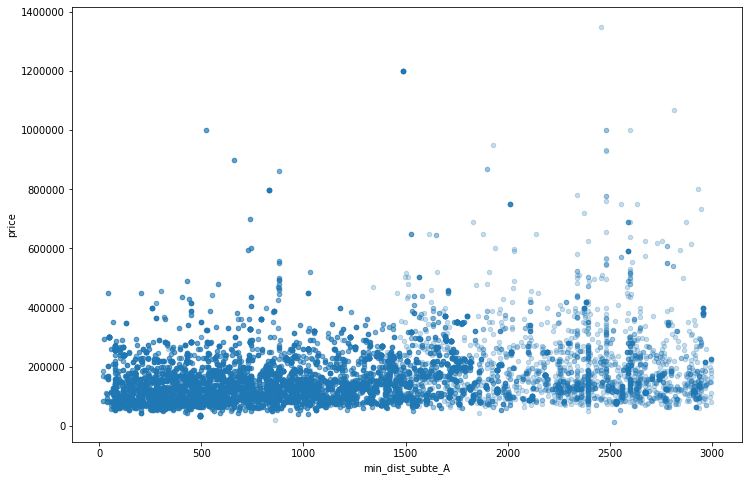

In [15]:
%matplotlib inline
propRecorridoA1 = finalRecorridoA[finalRecorridoA['price']< 1500000]
propRecorridoA2.plot.scatter('min_dist_subte_A', 'price',alpha=0.25, figsize=(12,8))

In [17]:
#Analisis para la linea B
i = 1
for index, row in estacionesB.iterrows():
    lon = estacionesB.loc[index,'X']
    lat = estacionesB.loc[index,'Y']
    label = str(i)
    propRecorridoB['lon' + label] = lon
    propRecorridoB['lat' + label] = lat
    i = i+1
    



/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
for row in estacionesB.iterrows():
    for i in range(1,10):
        label = str(i)
        lat1 = propRecorridoB['lat'].astype(float)
        lon1 = propRecorridoB['lon'].astype(float)
        lat2 = propRecorridoB['lat'+ label].astype(float)
        lon2 = propRecorridoB['lon'+ label].astype(float)
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoB['dist' + label] = dist
        

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
propRecorridoB['min_dist_subte_B'] =propRecorridoB.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6',
                                                  'dist7','dist8','dist9']].min(axis=1)


/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
finalRecorridoB = propRecorridoB[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro', 'min_dist_subte_B']]
finalRecorridoB.sample(5)

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte_B
48264,2019-03-01,2019-06-23,-34.617175,-58.393062,Balvanera,2.0,1.0,1.0,62.0,62.0,110000.0,Venta. Depto 2 ambientes. 62m². Reciclado. Baj...,CARACTERÍSTICAS- Ambientes: 2- Superficie Tota...,Departamento,Venta,0.025509,1420.414459
241,2019-08-05,2019-09-23,-34.604180,-58.414169,Almagro,4.0,3.0,1.0,75.0,71.0,150000.0,ALMAGRO MUY LUMINOSO 3 DORMITORIOS BALCON,Corredor Responsable: Luis Varela - CSI 5527 /...,Departamento,Venta,0.033621,220.588855
16148,2019-03-29,2019-06-23,-34.604969,-58.454082,Villa Crespo,1.0,1.0,1.0,43.0,35.0,95000.0,OPORTUNIDAD ÚNICA VILLA CRESPO VALOR M2 AL COS...,Departamento un ambiente divisible en Villa Cr...,Departamento,Venta,0.074323,2111.341551
48804,2019-07-08,2019-07-09,-34.602896,-58.431050,Almagro,4.0,3.0,2.0,97.0,89.0,290000.0,Departamento de 4 ambientes en Venta en Almagro,INTERESANTE 3 AMBIENTES CON DEPENDENCIA. AL FR...,Departamento,Venta,0.049576,84.150397
12582,2019-06-01,2019-09-14,-34.616619,-58.400294,Balvanera,2.0,1.0,1.0,39.0,36.0,109000.0,2 amb + entrepiso en Balvanera con amenities,Corredor Responsable: Mauro Marvisi - CUCICBA ...,Departamento,Venta,0.032185,1334.161372


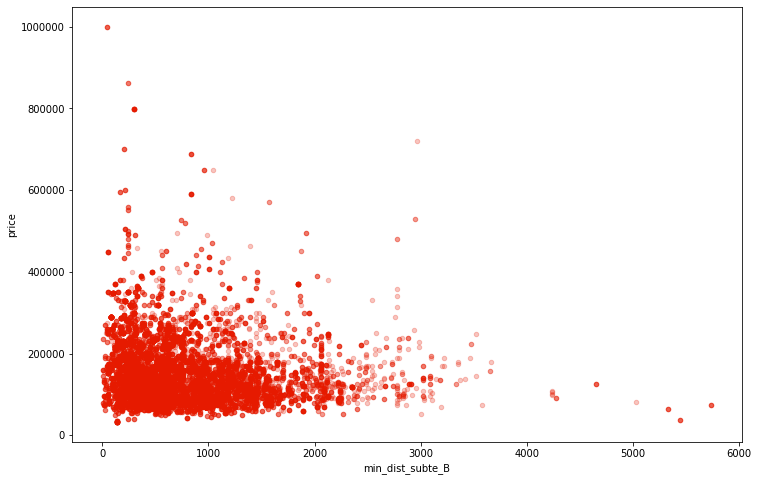

In [25]:
%matplotlib inline
propRecorridoB1 = finalRecorridoB[finalRecorridoB['price']< 1500000]
propRecorridoB1.plot.scatter('min_dist_subte_B', 'price',alpha=0.25, figsize=(12,8), color=(0.9,0.1,0.0))

In [26]:
#AHORA LA LINEA C
i = 1
for index, row in estacionesC.iterrows():
    lon = estacionesC.loc[index,'X']
    lat = estacionesC.loc[index,'Y']
    label = str(i)
    propRecorridoC['lon' + label] = lon
    propRecorridoC['lat' + label] = lat
    i = i+1
    

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:

for row in estacionesC.iterrows():
    for i in range(1,10):
        label = str(i)
        lat1 = propRecorridoC['lat'].astype(float)
        lon1 = propRecorridoC['lon'].astype(float)
        lat2 = propRecorridoC['lat'+ label].astype(float)
        lon2 = propRecorridoC['lon'+ label].astype(float)
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoC['dist' + label] = dist
        

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
propRecorridoC['min_dist_subte_C'] =propRecorridoC.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6',
                                                  'dist7','dist8','dist9']].min(axis=1)

finalRecorridoC = propRecorridoC[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro','min_dist_subte_C']]
finalRecorridoC.sample(5)

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte_C
4102,2019-05-11,2019-05-20,-34.612887,-58.373230,Monserrat,3.0,2.0,1.0,53.0,53.0,125000.0,Venta 2 amb + dep. Excelente ubicación,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,0.018235,661.095923
20014,2019-06-01,2019-06-27,-34.601145,-58.379289,Retiro,1.0,1.0,1.0,33.0,30.0,84000.0,DEPARTAMENTO TIPO PH EN VENTA EN SAN NICOLÁS,Corredor Responsable: M. DE LOS ANGELES VERONE...,Departamento,Venta,0.004294,124.880877
20655,2019-05-31,2019-06-29,-34.592896,-58.377250,Retiro,2.0,0.0,1.0,67.0,67.0,160000.0,Departamento - Retiro,Retiro - Plaza San Martín<br><br>Impecable. De...,Departamento,Venta,0.014582,245.968449
28577,2019-05-10,2019-08-22,-34.616433,-58.400677,Monserrat,3.0,0.0,1.0,77.0,77.0,157000.0,Departamento / PH - Tipo Loft - 3 Ambientes,Sobre la calle México al 2400: A Tan Solo Dos ...,Departamento,Venta,0.032382,1886.221458
20707,2019-03-28,2019-07-18,-34.613087,-58.381360,Monserrat,1.0,0.0,1.0,38.0,33.0,82000.0,Departamento - Monserrat,Lindisimo monoambiente apto vivienda/profesion...,Departamento,Venta,0.010305,98.757004


/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


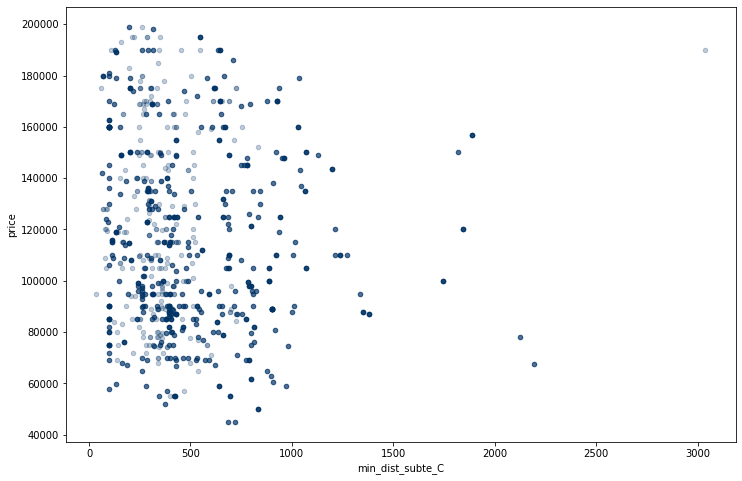

In [29]:
%matplotlib inline
propRecorridoC1 = propRecorridoC[propRecorridoC['price']< 200000]
propRecorridoC2 = propRecorridoC1[propRecorridoC['min_dist_subte_C']< 5000]
propRecorridoC1.plot.scatter('min_dist_subte_C', 'price',alpha=0.25, figsize=(12,8), color=(0.0,0.2,0.4))

In [30]:
#LINEA D
i = 1
for index, row in estacionesD.iterrows():
    lon = estacionesD.loc[index,'X']
    lat = estacionesD.loc[index,'Y']
    label = str(i)
    propRecorridoD['lon' + label] = lon
    propRecorridoD['lat' + label] = lat
    i = i+1

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
for row in estacionesD.iterrows():
    for i in range(1,17):
        label = str(i)
        lat1 = propRecorridoD['lat'].astype(float)
        lon1 = propRecorridoD['lon'].astype(float)
        lat2 = propRecorridoD['lat'+ label].astype(float)
        lon2 = propRecorridoD['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoE['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoD['dist' + label] = dist

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [32]:
propRecorridoD['min_dist_subte_D'] =propRecorridoD.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11','dist12','dist13','dist14','dist15','dist16']].min(axis=1)
finalRecorridoD = propRecorridoD[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro','min_dist_subte_D']]
finalRecorridoD.head()

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte_D
12,2019-05-21,2019-07-10,-34.601931,-58.411260,Balvanera,1.0,0.0,1.0,15.0,15.0,40000.0,DEPARTAMENTO EN VENTA,Xintel (MPX-PO9-5904) Venta Departamento tipo...,Departamento,Venta,0.030750,1164.321698
21,2019-05-21,9999-12-31,-34.613872,-58.404102,Balvanera,2.0,0.0,1.0,71.0,71.0,96500.0,Departamento - Balvanera,VENTA - DEPARTAMENTO DOS AMBIENTES CON TERRAZA...,Departamento,Venta,0.033246,1668.738921
22,2019-05-21,2019-06-08,-34.616463,-58.396059,Balvanera,2.0,1.0,1.0,47.0,42.0,110000.0,"2 ambientes con balcon, cochera y baulera - P...",Muy buen Dpto de 2 ambientes Living comedorCoc...,Departamento,Venta,0.027794,1866.008138
23,2019-05-21,2019-06-08,-34.611078,-58.410219,Balvanera,2.0,1.0,1.0,49.0,49.0,92000.0,Departamento de 2 ambientes en Venta en Balvanera,"2 ambientes super luminoso, cerca de todos los...",Departamento,Venta,0.036569,1688.944597
36,2019-05-21,2019-07-10,-34.610744,-58.372077,Monserrat,3.0,2.0,2.0,83.0,77.0,169000.0,DEPARTAMENTO EN VENTA,Xintel (LUO-LUO-24) Venta de Departamento 3 AM...,Departamento,Venta,0.017246,369.688734


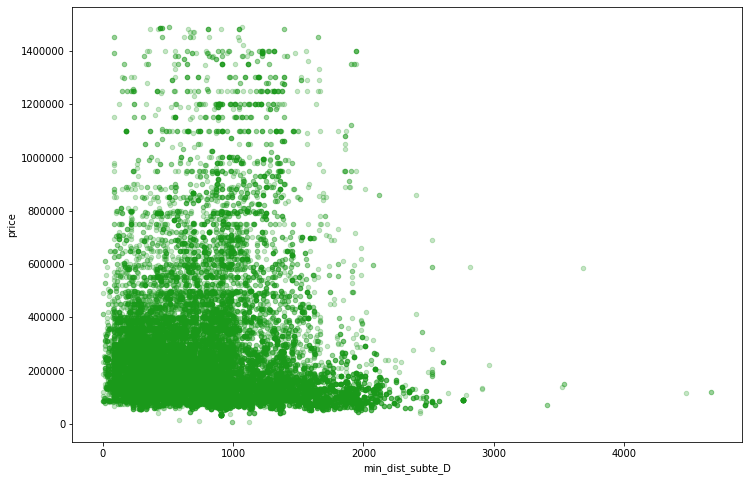

In [33]:
%matplotlib inline
propRecorridoD1 = propRecorridoD[propRecorridoD['price']< 1500000]
propRecorridoD2 = propRecorridoD1[propRecorridoD1['min_dist_subte_D']< 5000]
propRecorridoD2.plot.scatter('min_dist_subte_D', 'price',alpha=0.25, figsize=(12,8), color=(0.1,0.6,0.1))

In [34]:
#LINEA E
i = 1
for index, row in estacionesE.iterrows():
    lon = estacionesE.loc[index,'X']
    lat = estacionesE.loc[index,'Y']
    label = str(i)
    propRecorridoE['lon' + label] = lon
    propRecorridoE['lat' + label] = lat
    i = i+1


/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
for row in estacionesE.iterrows():
    for i in range(1,16):
        label = str(i)
        lat1 = propRecorridoE['lat'].astype(float)
        lon1 = propRecorridoE['lon'].astype(float)
        lat2 = propRecorridoE['lat'+ label].astype(float)
        lon2 = propRecorridoE['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoE['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoE['dist' + label] = dist

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [36]:
propRecorridoE['min_dist_subte_E'] =propRecorridoE.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11','dist12','dist13','dist14','dist15']].min(axis=1)
finalRecorridoE = propRecorridoE[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro','min_dist_subte_E']]
finalRecorridoE.head()

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte_E
36,2019-05-21,2019-07-10,-34.610744,-58.372077,Monserrat,3.0,2.0,2.0,83.0,77.0,169000.0,DEPARTAMENTO EN VENTA,Xintel (LUO-LUO-24) Venta de Departamento 3 AM...,Departamento,Venta,0.017246,222.627703
78,2019-04-20,2019-09-14,-34.615650,-58.387405,Monserrat,2.0,1.0,1.0,50.0,42.0,90000.0,Departamento de 2 ambientes Monserrat,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,0.018327,594.510205
79,2019-04-20,2019-08-17,-34.619970,-58.388099,Monserrat,1.0,1.0,1.0,38.0,38.0,86900.0,Monoambiente contrafrente con parrilla y ameni...,Corredor Responsable: Win Bienes Raices SRL - ...,Departamento,Venta,0.023341,377.345598
125,2019-04-09,2019-06-23,-34.618772,-58.388855,Monserrat,1.0,1.0,1.0,32.0,32.0,61600.0,EXCLUSIVA VENTA DESDE POZO - AMPLIA FINANCIACION,PROYECTO VIRREY CEVALLOS. Es un Emprendimiento...,Departamento,Venta,0.022899,501.941434
143,2019-04-09,2019-06-23,-34.618772,-58.388855,Monserrat,2.0,1.0,1.0,32.0,32.0,121500.0,EXCLUSIVA VENTA DESDE POZO - AMPLIA FINANCIACION,PROYECTO VIRREY CEVALLOS. Es un Emprendimiento...,Departamento,Venta,0.022899,501.941434


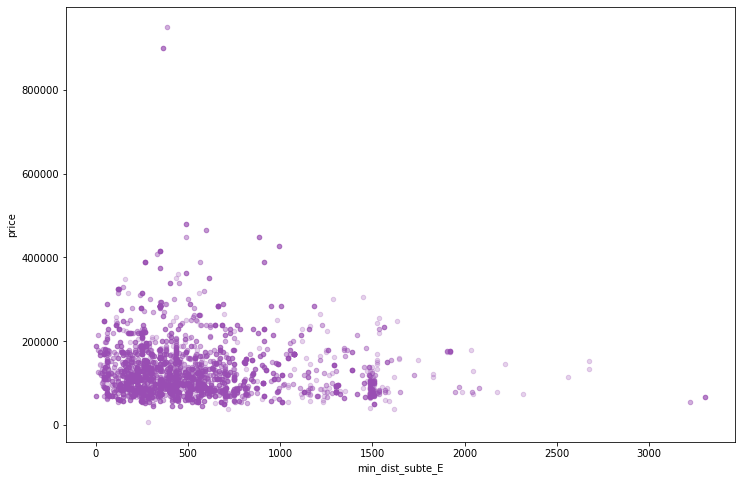

In [37]:
%matplotlib inline
propRecorridoE1 = propRecorridoE[propRecorridoE['price']< 1000000]
propRecorridoE2 = propRecorridoE1[propRecorridoE1['min_dist_subte_E']< 4000]
propRecorridoE2.plot.scatter('min_dist_subte_E', 'price',alpha=0.25, figsize=(12,8), color=(0.6,0.3,0.7))

In [38]:
#LINEA H
i = 1
for index, row in estacionesH.iterrows():
    lon = estacionesH.loc[index,'X']
    lat = estacionesH.loc[index,'Y']
    label = str(i)
    propRecorridoH['lon' + label] = lon
    propRecorridoH['lat' + label] = lat
    i = i+1

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
for row in estacionesH.iterrows():
    for i in range(1,12):
        label = str(i)
        lat1 = propRecorridoH['lat'].astype(float)
        lon1 = propRecorridoH['lon'].astype(float)
        lat2 = propRecorridoH['lat'+ label].astype(float)
        lon2 = propRecorridoH['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoH['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoH['dist' + label] = dist

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [40]:
propRecorridoH['min_dist_subte_H'] =propRecorridoH.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11']].min(axis=1)
finalRecorridoH = propRecorridoH[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro','min_dist_subte_H']]
finalRecorridoH.head()

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte_H
4,2019-07-18,2019-09-13,-34.606584,-58.430829,Almagro,1.0,0.0,1.0,39.0,35.0,95500.0,RIO DE JANEIRO 700 / DEPARTAMENTO EN VENTA / M...,RIO DE JANEIRO 750 / ENTREGA DICIEMBRE 2019 / ...,Departamento,Venta,0.052685,2284.696044
8,2019-05-21,2019-06-08,-34.598219,-58.430038,Almagro,1.0,0.0,1.0,39.0,35.0,118000.0,Departamento de 1 ambiente en Venta en Almagro,Excelente departamento de un ambiente al frent...,Departamento,Venta,0.053241,2356.663848
9,2019-05-21,2019-06-08,-34.600566,-58.426718,Almagro,1.0,0.0,1.0,23.0,23.0,69000.0,Departamento de 1 ambiente en Venta en Almagro...,"Lindo monoambiente en muy buen estado, con coc...",Departamento,Venta,0.047574,1995.384535
10,2019-05-21,2019-06-08,-34.598219,-58.430038,Almagro,1.0,0.0,1.0,38.0,34.0,115000.0,Departamento de 1 ambiente en Venta en Almagro,Excelente departamento de un ambiente al contr...,Departamento,Venta,0.053241,2356.663848
11,2019-05-21,2019-06-08,-34.598219,-58.430038,Almagro,1.0,0.0,1.0,39.0,35.0,118000.0,Departamento de 1 ambiente en Venta en Almagro...,Excelente departamento de un ambiente al frent...,Departamento,Venta,0.053241,2356.663848


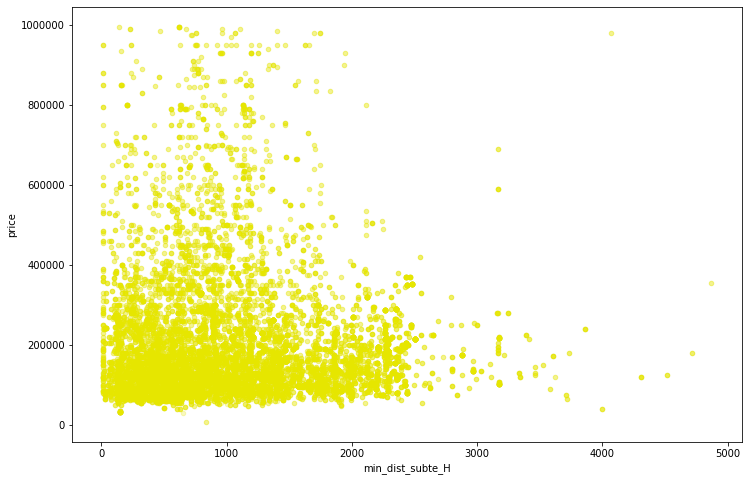

In [41]:
%matplotlib inline
propRecorridoH1 = propRecorridoH[propRecorridoH['price']< 1000000]
propRecorridoH2 = propRecorridoH1[propRecorridoH1['min_dist_subte_H']< 5000]
propRecorridoH2.plot.scatter('min_dist_subte_H', 'price',alpha=0.25, figsize=(12,8), color=(0.9,0.9,0.0))

In [42]:
final = pd.concat([finalRecorridoA, finalRecorridoB, finalRecorridoC, finalRecorridoD, finalRecorridoE, finalRecorridoH])
final.head(10)

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,barrio,bathrooms,bedrooms,description,dist_centro,end_date,lat,lon,min_dist_subte_A,min_dist_subte_B,...,min_dist_subte_E,min_dist_subte_H,operation_type,price,property_type,rooms,start_date,surface_covered,surface_total,title
0,Floresta,1.0,1.0,"Departamento en Venta, Departamento 2 ambiente...",0.128801,2019-07-31,-34.631462,-58.482067,6539.595979,NaN,...,NaN,NaN,Venta,82000.0,Departamento,2.0,2019-07-18,35.0,35.0,Venta Departamento en Floresta Capital Federal...
1,Floresta,1.0,1.0,"Departamento en Venta, Departamento 2 ambiente...",0.127855,2019-07-31,-34.631199,-58.481384,6470.797146,NaN,...,NaN,NaN,Venta,87000.0,Departamento,2.0,2019-07-18,37.0,37.0,Venta Departamento en Floresta Capital Federal...
2,Caballito,1.0,2.0,Departamento en venta de 3 Ambientes con excel...,0.075768,2019-09-11,-34.624594,-58.435902,2440.478765,NaN,...,NaN,NaN,Venta,137000.0,Departamento,3.0,2019-07-18,65.0,55.0,Venta de Departamento 3 Ambientes en Caballito
3,Caballito,1.0,2.0,departamento de 3 ambientes de muy buena distr...,0.086839,2019-09-11,-34.619450,-58.452117,3515.407074,NaN,...,NaN,NaN,Venta,218000.0,Departamento,3.0,2019-07-18,78.0,82.0,Departamento 3 amb impecable con cochera
4,Almagro,1.0,0.0,RIO DE JANEIRO 750 / ENTREGA DICIEMBRE 2019 / ...,0.052685,2019-09-13,-34.606584,-58.430829,1506.268178,NaN,...,NaN,NaN,Venta,95500.0,Departamento,1.0,2019-07-18,35.0,39.0,RIO DE JANEIRO 700 / DEPARTAMENTO EN VENTA / M...
5,Caballito,1.0,0.0,MUY BUEN DEPARTAMENTO DE 3 AMBIENTES CON DEPEN...,0.076519,9999-12-31,-34.619383,-58.441864,2622.753642,NaN,...,NaN,NaN,Venta,180000.0,Departamento,3.0,2019-07-18,70.0,79.0,VENTA DEPARTAMENTO 3 AMBIENTES DEPENDENCIA BAL...
6,Caballito,1.0,0.0,Se vende excelente monoambiente ubicado en jos...,0.072823,2019-10-02,-34.622357,-58.435193,2238.719755,NaN,...,NaN,NaN,Venta,78000.0,Departamento,1.0,2019-07-18,23.0,23.0,Departamento - Caballito
7,Flores,1.0,0.0,Ubicación: Fray Luis Beltrán entre Rivadavia y...,0.099968,2019-09-11,-34.626690,-58.458006,4300.364847,NaN,...,NaN,NaN,Venta,92000.0,Departamento,1.0,2019-05-21,29.0,33.0,VENTA MONOAMBIENTE EXCELENTE UBICACIÓN
8,Almagro,1.0,0.0,Excelente departamento de un ambiente al frent...,0.053241,2019-06-08,-34.598219,-58.430038,1949.676639,NaN,...,NaN,NaN,Venta,118000.0,Departamento,1.0,2019-05-21,35.0,39.0,Departamento de 1 ambiente en Venta en Almagro
9,Almagro,1.0,0.0,"Lindo monoambiente en muy buen estado, con coc...",0.047574,2019-06-08,-34.600566,-58.426718,1551.013066,NaN,...,NaN,NaN,Venta,69000.0,Departamento,1.0,2019-05-21,23.0,23.0,Departamento de 1 ambiente en Venta en Almagro...


In [49]:
#Me quedo con la distancia minima de cada propiedad a cualquier subte (si esta cerca de 2, me quedo con el mas cercano)
final['min_dist_subte (m)'] =final.loc[:,['min_dist_subte_A','min_dist_subte_B','min_dist_subte_C','min_dist_subte_D','min_dist_subte_E','min_dist_subte_H']].min(axis=1)
dmin = final[['start_date','end_date','lat','lon','barrio','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','title','description','property_type','operation_type','dist_centro','min_dist_subte (m)']]
dmin.head(20)

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte (m)
0,2019-07-18,2019-07-31,-34.631462,-58.482067,Floresta,2.0,1.0,1.0,35.0,35.0,82000.0,Venta Departamento en Floresta Capital Federal...,"Departamento en Venta, Departamento 2 ambiente...",Departamento,Venta,0.128801,6539.595979
1,2019-07-18,2019-07-31,-34.631199,-58.481384,Floresta,2.0,1.0,1.0,37.0,37.0,87000.0,Venta Departamento en Floresta Capital Federal...,"Departamento en Venta, Departamento 2 ambiente...",Departamento,Venta,0.127855,6470.797146
2,2019-07-18,2019-09-11,-34.624594,-58.435902,Caballito,3.0,2.0,1.0,55.0,65.0,137000.0,Venta de Departamento 3 Ambientes en Caballito,Departamento en venta de 3 Ambientes con excel...,Departamento,Venta,0.075768,2440.478765
3,2019-07-18,2019-09-11,-34.619450,-58.452117,Caballito,3.0,2.0,1.0,82.0,78.0,218000.0,Departamento 3 amb impecable con cochera,departamento de 3 ambientes de muy buena distr...,Departamento,Venta,0.086839,3515.407074
4,2019-07-18,2019-09-13,-34.606584,-58.430829,Almagro,1.0,0.0,1.0,39.0,35.0,95500.0,RIO DE JANEIRO 700 / DEPARTAMENTO EN VENTA / M...,RIO DE JANEIRO 750 / ENTREGA DICIEMBRE 2019 / ...,Departamento,Venta,0.052685,1506.268178
5,2019-07-18,9999-12-31,-34.619383,-58.441864,Caballito,3.0,0.0,1.0,79.0,70.0,180000.0,VENTA DEPARTAMENTO 3 AMBIENTES DEPENDENCIA BAL...,MUY BUEN DEPARTAMENTO DE 3 AMBIENTES CON DEPEN...,Departamento,Venta,0.076519,2622.753642
6,2019-07-18,2019-10-02,-34.622357,-58.435193,Caballito,1.0,0.0,1.0,23.0,23.0,78000.0,Departamento - Caballito,Se vende excelente monoambiente ubicado en jos...,Departamento,Venta,0.072823,2238.719755
7,2019-05-21,2019-09-11,-34.626690,-58.458006,Flores,1.0,0.0,1.0,33.0,29.0,92000.0,VENTA MONOAMBIENTE EXCELENTE UBICACIÓN,Ubicación: Fray Luis Beltrán entre Rivadavia y...,Departamento,Venta,0.099968,4300.364847
8,2019-05-21,2019-06-08,-34.598219,-58.430038,Almagro,1.0,0.0,1.0,39.0,35.0,118000.0,Departamento de 1 ambiente en Venta en Almagro,Excelente departamento de un ambiente al frent...,Departamento,Venta,0.053241,1949.676639
9,2019-05-21,2019-06-08,-34.600566,-58.426718,Almagro,1.0,0.0,1.0,23.0,23.0,69000.0,Departamento de 1 ambiente en Venta en Almagro...,"Lindo monoambiente en muy buen estado, con coc...",Departamento,Venta,0.047574,1551.013066


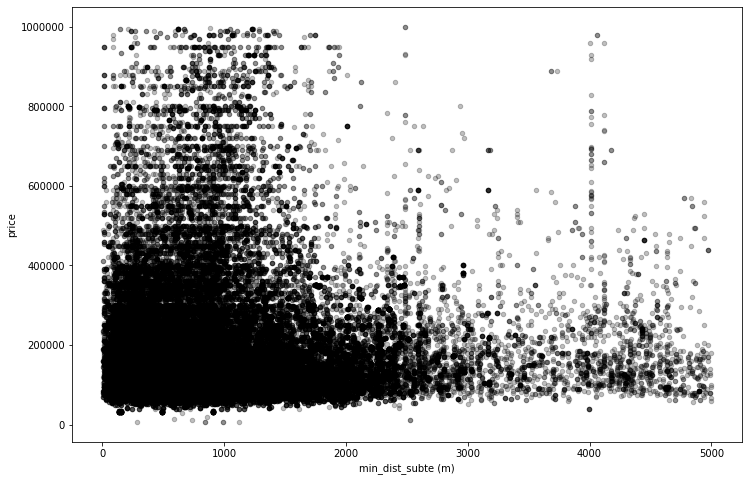

In [50]:
#Grafico la relacion precio vs distancia a CUALQUIER subte
%matplotlib inline
dmin1 = dmin[dmin['price']< 1000000]
dmin2 = dmin1[dmin1['min_dist_subte (m)']< 5000]
dmin2.plot.scatter('min_dist_subte (m)', 'price',alpha=0.25, figsize=(12,8), color=(0.0,0.0,0.0))

In [51]:
##df.to_csv(r'/home/santiago/Desktop/Academico/UBA/Introduccion a los Sistemas Inteligentes(75.50)/TP Final/TP/Git/TPSistemasInteligentes/datos con distancia a subtes.csv')
dmin.sample(20)

,start_date,end_date,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,operation_type,dist_centro,min_dist_subte (m)
44157,2019-03-12,2019-03-27,-34.601009,-58.425484,Almagro,3.0,2.0,2.0,68.0,60.0,232000.0,Departamento de 3 ambientes en Venta en Almagro,"Excelente departamento de 3 ambientes, 67 m2 t...",Departamento,Venta,0.045897,1438.871536
32167,2019-06-19,2019-08-31,-34.580579,-58.440173,Palermo,2.0,0.0,1.0,42.0,35.0,160000.0,Departamento - Palermo Hollywood,2 AMBIENTES EN PALERMO HOLLYWOOD!<br><br>Apart...,Departamento,Venta,0.081015,764.240932
37828,2019-05-04,2019-06-12,-34.610122,-58.405941,Balvanera,2.0,1.0,1.0,44.0,44.0,99000.0,Viamonte y Jean Jaures. SIN COMISION. Todo ref...,Monoambiente divisible de 44 m2. Todo refaccio...,Departamento,Venta,0.031335,77.942351
12823,2019-04-05,2019-09-11,-34.601495,-58.433382,Villa Crespo,2.0,1.0,1.0,50.0,46.0,153000.0,"VILLA CRESPO ,FRIAS AL 400",Impecable 2 ambientes en venta en Villa Crespo...,Departamento,Venta,0.053309,206.811230
3678,2019-05-09,9999-12-31,-34.630235,-58.449898,Caballito,4.0,0.0,3.0,150.0,115.0,375000.0,Directorio 1600 - Dpto tipo casa - 2 plantas -...,Moderno departamento Tipo Casa en 2 plantas<br...,Departamento,Venta,0.095405,3844.056615
25197,2019-08-10,2019-08-17,-34.580687,-58.425526,Palermo,2.0,1.0,1.0,40.0,40.0,130000.0,VENTA DEPARTAMENTO 2 AMBIENTES LUMINOSOS PALERMO,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento,Venta,0.066261,252.496681
14171,2019-06-07,2019-07-24,-34.609088,-58.427568,Almagro,1.0,0.0,1.0,41.0,37.0,89550.0,PRINGLES 200. ANT U$D37.550+36 CTS $40.444 8/2021,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento,Venta,0.051928,1149.064751
2923,2019-06-29,2019-06-30,-34.602098,-58.429997,Almagro,3.0,2.0,1.0,100.0,100.0,179000.0,Departamento de 3 ambientes en Venta en Almagro,"Excelente unidad en primer piso, 4 ambientes c...",Departamento,Venta,0.049321,117.136886
43736,2019-07-04,2019-07-09,-34.601364,-58.430143,Almagro,4.0,3.0,2.0,78.0,70.0,184000.0,Departamento de 4 ambientes en Venta en Almagro,Lindo departamento de 3 ambientes c/depndencia...,Departamento,Venta,0.050201,1724.021222
49611,2019-06-05,2019-08-17,-34.606530,-58.411837,Almagro,2.0,1.0,1.0,44.0,44.0,78000.0,DEPARTAMENTO 2 AMB ALMAGRO 44 M2 MUY LUMINOSO,Corredor Responsable: Cristian Arnal Ponti - C...,Departamento,Venta,0.033639,272.643123


In [52]:
dmin.to_csv('dataFiltrada/dataV5.csv')
